Progetto Data Analytics - attività 1

Il progetto si suddivide nelle seguenti parti:

* Introduzione e descrizione generale del Dataset
* Pulizia del Dataset
* Analisi Esplorativa
* Outlier Detection
* Predizione degli streams fatti su Spotify nei primi mesi del 2024
* Conclusione

# **Introduzione**

Il dataset utilizzato per l'analisi è **Most Streamed Spotify Songs 2024**, disponibile su Kaggle al link https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024.

Il dataset presenta 4600 righe e 29 colonne. Ogni riga rappresenta una delle 4600 canzoni più ascoltate su Spotify nei primi mesi del 2024. Le colonne contengono il nome della traccia, dell'album e dell'artista; la data di pubblicazione della canzone, un punteggio assegnato sulla base di alcuni parametri (non esplicitati nella descrizione del dataset) e diversi dati relativi a varie piattaforme di streaming di musica e altri siti web.

In particolare ho deciso di concentrarmi su:
* **Track**: titolo della canzone
* **Album Name**: titolo dell'album
* **Artist**: nome dell'artista
* **Release Date**: data di pubblicazione della canzone
* **Track Score**: punteggio assegnato alla canzone
* **Explicit Track**: presenza di contenuto esplicito
* **Spotify Streams**: numero di ascolti su Spotify
* **Spotify Playlist Count**: numero di playlist Spotify in cui è contenuta la canzone
* **Spotify Playlist Reach**: numero di utenti che seguono una playlist Spotify in cui è presente la canzone
* **Spotify Popularity**: punteggio assegnato in base alla popolarità su Spotify
* **YouTube Views**: numero di visualizzazioni su YouTube
* **YouTube Likes**: numero di like su YouTube
* **YouTube Playlist Reach**: numero di utenti che seguono una playlist YouTube in cui è presente la canzone
* **TikTok Posts**: numero di post pubblicati su TikTok contenenti la canzone
* **TikTok Likes**: numero di like dei post TikTok contententi la canzone
* **TikTok Views**: numero di visualizzazioni dei post TikTok contenenti la canzone


Carico il dataset. Della data di pubblicazione della canzone considero l'anno e il mese in due colonne separate.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin-1')
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].dt.month
df = df[['Track','Album Name','Artist','Release Year','Release Month','Track Score','Explicit Track',
         'Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach', 'Spotify Popularity',
         'YouTube Views','YouTube Likes','YouTube Playlist Reach','TikTok Posts','TikTok Likes','TikTok Views']]
df

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024,4,725.4,0,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","150,597,040","5,767,700","651,565,900","5,332,281,936"
1,Not Like Us,Not Like Us,Kendrick Lamar,2024,5,545.9,1,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","156,380,351","674,700","35,223,547","208,339,025"
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024,3,538.4,0,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","373,784,955","3,025,400","275,154,237","3,369,120,610"
3,Flowers,Flowers - Single,Miley Cyrus,2023,1,444.9,0,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","3,351,188,582","7,189,811","1,078,757,968","14,603,725,994"
4,Houdini,Houdini,Eminem,2024,5,423.3,1,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","112,763,851","16,400",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017,9,19.4,1,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","53,016","48,370","20,202,000","143,934,379"
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018,7,19.4,0,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766","24,973,048",NaN,"1,721","19,935"
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020,2,19.4,1,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","29,253,152","7,596","5,288,677","36,849,005"
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016,11,19.4,0,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","25,150,516","11,433","2,534,831","37,757,301"


Il dataset è costituito da 4600 righe e 17 colonne.  Visualizzo il tipo di dati per ogni colonna.

In [2]:
df.dtypes

,0
Track,object
Album Name,object
Artist,object
Release Year,int32
Release Month,int32
Track Score,float64
Explicit Track,int64
Spotify Streams,object
Spotify Playlist Count,object
Spotify Playlist Reach,object


Trasformo nel formato opportuno le colonne di tipo object che contengono dati numerici scritti sottoforma di stringa.

In [3]:
columns_to_convert = ['Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach',
                      'YouTube Views','YouTube Likes', 'YouTube Playlist Reach', 'TikTok Posts',
                      'TikTok Likes','TikTok Views']
for col in columns_to_convert:
  df[col] = df[col].str.replace(',', '').astype(float)

df.head()


,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024,4,725.4,0,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,1.505970e+08,5767700.0,6.515659e+08,5.332282e+09
1,Not Like Us,Not Like Us,Kendrick Lamar,2024,5,545.9,1,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,1.563804e+08,674700.0,3.522355e+07,2.083390e+08
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024,3,538.4,0,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3.737850e+08,3025400.0,2.751542e+08,3.369121e+09
3,Flowers,Flowers - Single,Miley Cyrus,2023,1,444.9,0,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,3.351189e+09,7189811.0,1.078758e+09,1.460373e+10
4,Houdini,Houdini,Eminem,2024,5,423.3,1,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,1.127639e+08,16400.0,NaN,NaN


Infine, stampo le statistiche di base del dataset, da cui sembra non esserci alcun outlier di tipo contestuale.

In [4]:
df.describe()

,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
count,4600.000000,4600.000000,4600.000000,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.591000e+03,3.427000e+03,3.620000e+03,3.619000e+03
mean,2020.616739,6.046304,41.844043,0.358913,4.473873e+08,59390.829801,2.334682e+07,63.501581,4.027967e+08,2.930049e+06,3.439601e+08,9.443076e+05,1.126375e+08,1.161158e+09
std,3.611707,3.419663,38.543766,0.479734,5.384439e+08,71131.406625,2.968717e+07,16.186438,7.019000e+08,4.593640e+06,6.704811e+08,2.442080e+06,5.498123e+08,5.881584e+09
min,1987.000000,1.000000,19.400000,0.000000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,1.000000e+00,3.000000e+00,1.900000e+01
25%,2019.000000,3.000000,23.300000,0.000000,7.038630e+07,6718.000000,4.791612e+06,61.000000,4.073032e+07,4.095490e+05,1.171869e+07,3.818650e+04,5.814876e+06,5.902786e+07
50%,2022.000000,6.000000,29.900000,0.000000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,9.814272e+07,1.822000e+05,2.653441e+07,2.659172e+08
75%,2023.000000,9.000000,44.425000,1.000000,6.283638e+08,86038.750000,2.966069e+07,73.000000,4.647882e+08,3.573193e+06,3.114059e+08,7.948775e+05,9.328418e+07,9.134169e+08
max,2024.000000,12.000000,725.400000,1.000000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,7.289707e+09,4.290000e+07,2.347422e+10,2.332323e+11


# **Pulizia del dataset**

Innanzitutto, controllo se ci sono dei duplicati all'interno del dataset e, nel caso, li elimino.

In [5]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
2449,Tennessee Orange,Tennessee Orange,Megan Moroney,2022,9,28.9,0,227893586.0,28139.0,12480714.0,73.0,30913276.0,159791.0,238206228.0,77661.0,13324305.0,117505652.0
2450,Tennessee Orange,Tennessee Orange,Megan Moroney,2022,9,28.9,0,227893586.0,28139.0,12480714.0,73.0,30913276.0,159791.0,238206228.0,77661.0,13324305.0,117505652.0
3447,Dembow,Dembow,Danny Ocean,2017,12,23.3,0,579189526.0,60397.0,11805084.0,65.0,828853696.0,3086157.0,199705679.0,84450.0,21202350.0,158504854.0
3450,Dembow,Dembow,Danny Ocean,2017,12,23.3,0,579189526.0,60397.0,11805084.0,65.0,828853696.0,3086157.0,199705679.0,84450.0,21202350.0,158504854.0


In [6]:
df.drop_duplicates(inplace=True)
df.shape

(4598, 17)

Vedo quanti NaN sono presenti all'interno del dataset.

In [7]:
df.isna().sum()

,0
Track,0
Album Name,0
Artist,5
Release Year,0
Release Month,0
Track Score,0
Explicit Track,0
Spotify Streams,113
Spotify Playlist Count,70
Spotify Playlist Reach,72


Ci sono 5 canzoni di cui manca il nome dell'artista. Ai fini della predizione degli Spotify Streams, conoscere il nome dell'artista non è rilevante. Tra l'altro, basta fare una semplice ricerca su internet sulla base del nome della canzone e dell'album per risalire all'artista. Stampo queste righe per verificare che non contengano altri NaN.

In [8]:
artist_rows = df.loc[df['Artist'].isnull()]
artist_rows

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
311,Cool,JnD Mix,NaN,2024,5,86.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,I Wanna Party,I Wanna Party - Single,NaN,2024,5,70.3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1345,Marlboro Remix,Marlboro Remix - Single,NaN,2024,6,40.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1561,Melting,Melting - Single,NaN,2024,6,37.2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3402,La ï¿½ï¿½ltima Vez (Yo Te Per,La ï¿½ï¿½ltima Vez (Yo Te Perdï¿½ï¿½),NaN,2024,5,23.6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


È possibile osservare che queste righe presentano NaN in tutte le altre colonne di nostro interesse e, quindi, conviene eliminarle.

In [9]:
df_drop = df.dropna(subset=['Artist'])
df_drop.isna().sum()

,0
Track,0
Album Name,0
Artist,0
Release Year,0
Release Month,0
Track Score,0
Explicit Track,0
Spotify Streams,108
Spotify Playlist Count,65
Spotify Playlist Reach,67


Osservo che la colonna TikTok Posts presenta 1168 NaN. Essendo un valore così elevato, potrebbe non essere ragionevole andare a imputare tutti questi valori. Valuto cosa fare anche in base all'eventuale presenza di altri NaN all'interno delle stesse righe.

In [10]:
df_drop[df_drop['TikTok Posts'].isna()]

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
6,Beautiful Things,Beautiful Things,Benson Boone,2024,1,407.2,0,9.001588e+08,73118.0,201585714.0,86.0,3.087231e+08,4120760.0,4.601580e+09,NaN,29584940.0,534915313.0
8,Danza Kuduro - Cover,ýýýýýýýýýýýýýýýýýýýýý - ýýýýýýýýýýýýýýýýýý -,MUSIC LAB JPN,2024,6,355.7,1,1.653018e+09,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,I Had Some Help (feat. Morgan Wallen),I Had Some Help,Post Malone,2024,5,322.1,1,2.500804e+08,16219.0,168766158.0,91.0,3.222906e+07,550191.0,3.271308e+08,NaN,184500.0,2100000.0
11,The Door,The Door,Teddy Swims,2024,6,320.2,1,1.111551e+08,2.0,263767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Like That,WE DON'T TRUST YOU,Future,2024,3,308.2,1,3.551864e+08,43025.0,108168634.0,88.0,9.808149e+07,1456177.0,1.744914e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,Bodak Yellow,Pï¿½ï¿½bu (Camemicua,Serranow,2017,11,19.5,0,8.402000e+03,4.0,33.0,NaN,1.152051e+09,8477904.0,2.939119e+08,NaN,NaN,NaN
4588,Braten,Braten,Steps,2022,12,19.5,1,2.422310e+05,390.0,6228.0,25.0,2.404915e+08,1805305.0,1.666826e+08,NaN,NaN,NaN
4593,"Jaragandi (From ""Game Changer"") (Telugu)","Jaragandi (From ""Game Changer"") (Telugu)",Thaman S,2024,3,19.4,0,3.754914e+06,101.0,1306604.0,NaN,3.431531e+07,431343.0,NaN,NaN,NaN,NaN
4594,ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...,ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [pr...,BUSHIDO ZHO,2024,5,19.4,1,5.092789e+06,685.0,185936.0,62.0,1.042300e+07,288976.0,NaN,NaN,3635.0,27800.0


Dal momento che anche le altre colonne hanno dei dati mancanti, ovvero le righe sono piuttosto sparse, rimuovo tutte le righe che presentano dei NaN nella colonna TikTok Posts.

In [11]:
df_drop = df_drop.dropna(subset=['TikTok Posts'])
df_drop.isna().sum()

,0
Track,0
Album Name,0
Artist,0
Release Year,0
Release Month,0
Track Score,0
Explicit Track,0
Spotify Streams,21
Spotify Playlist Count,3
Spotify Playlist Reach,3


È possibile notare che, avendo rimosso le righe contenenti valori mancanti nella colonna TikTok Posts, il numero di NaN è diminuito per la maggior parte delle variabili.

Il prossimo passo potrebbe essere quello di imputare i restanti NaN tramite il metodo KNN Imputer. Tuttavia, bisogna prima verificare che le distribuzioni non siano troppo cambiate in seguito alla rimozione di queste 1168 righe.


Per confrontare graficamente le distribuzioni, in `plt.hist` imposto il parametro `density=True` che normalizza l'istogramma in modo tale che l'area totale delle barre sia uguale a 1. Ciò vuol dire che l'altezza di ciascuna barra rappresenta la densità di probabilità dei dati all'interno della barra corrispondente, piuttosto che il conteggio. Anche per la variabile Release Month visualizzo la frequenza relativa nel bar-plot. Questo è utile per confrontare distribuzioni di dati con un diverso numero di osservazioni. Infatti, in questo caso, si vogliono confrontare le distribuzioni di ogni colonna prima e dopo aver rimosso delle righe.

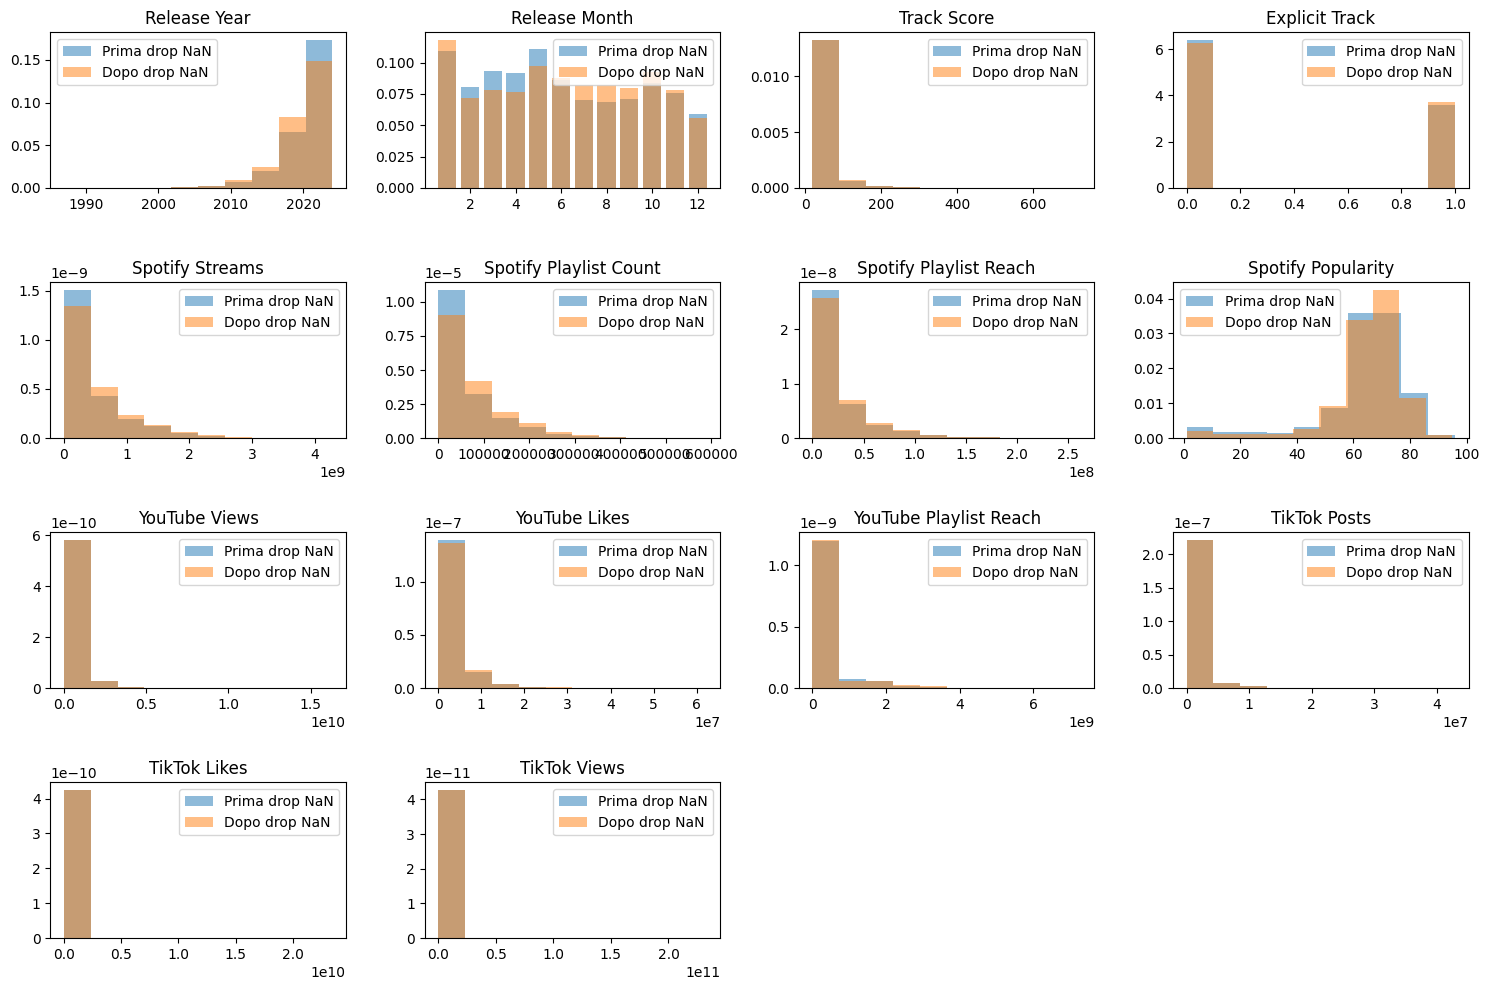

In [12]:
from collections import Counter

plt.figure(figsize=(15, 10))
columns = ['Release Year','Release Month','Track Score','Explicit Track', 'Spotify Streams','Spotify Playlist Count',
           'Spotify Playlist Reach','Spotify Popularity', 'YouTube Views','YouTube Likes','YouTube Playlist Reach',
           'TikTok Posts','TikTok Likes','TikTok Views']
i = 1
for col in columns:
  plt.subplot(4,4,int(i))
  if col == 'Release Month':
    conteggi = Counter(df['Release Month'])
    categorie = list(conteggi.keys())
    valori_conteggi = list(conteggi.values())
    frequenze_relative = np.array(valori_conteggi) / np.sum(valori_conteggi)
    plt.bar(categorie, frequenze_relative, alpha=0.5, label='Prima drop NaN')

    conteggi = Counter(df_drop['Release Month'])
    categorie = list(conteggi.keys())
    valori_conteggi = list(conteggi.values())
    frequenze_relative = np.array(valori_conteggi) / np.sum(valori_conteggi)
    plt.bar(categorie, frequenze_relative, alpha=0.5, label='Dopo drop NaN')
  else:
    plt.hist(df[col], alpha=0.5, label='Prima drop NaN', density=True)
    plt.hist(df_drop[col], alpha=0.5, label='Dopo drop NaN', density=True)
  plt.title(col)
  plt.legend()
  i=i+1

plt.tight_layout()
plt.show()

Per visualizzare e apprezzare meglio le distribuzioni di ogni variabile, conviene trasformarle e normalizzarle opportunamente.

Non apporto alcuna trasformazione alle variabili Release Year ed Explicit Track, applico il logaritmo a tutte quelle aventi una coda lunga a destra e uso la trasformazione Box-Cox per le restanti. Infine,  riscalo i dati tramite il Robust Scaler, che è in grado di gestire variabili non distribuite in modo simmetrico ed è molto robusto agli outlier.

Queste operazioni tornano utili anche per imputare tramite KNN, in quanto gli algoritmi di machine learning prediligono distribuzioni che siano le più gaussiane possibile e che abbiano la stessa scala.

In [13]:
from scipy.stats import boxcox
no_transf = ['Release Year', 'Explicit Track']
to_log = ['Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Likes', 'YouTube Playlist Reach']
to_box_cox = ['Track Score', 'Spotify Popularity', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'TikTok Views']

for var in to_log:
  df.loc[:,var] = np.log(df[var] + 1e-6)
  df_drop.loc[:,var] = np.log(df_drop[var] + 1e-6)

# La funzione Box-Cox non è in grado di gestire i NaN quindi bisogna trattarli separatamente
lambda_dict = {}
lambda_dict_drop = {}
for var in to_box_cox:
  # Determino gli elementi non-NaN di ogni colonna
  no_nan_data = df[var][~np.isnan(df[var])]
  no_nan_data_drop = df_drop[var][~np.isnan(df_drop[var])]

  # Applico la trasformazione Box-Cox agli elementi non-NaN salvando il lambda ottimale nel dizionario
  transformed_data, lambda_value = boxcox(no_nan_data + 1e-6)
  lambda_dict[f'lambda_{var}'] = lambda_value
  transformed_data_drop, lambda_value_drop = boxcox(no_nan_data_drop + 1e-6)
  lambda_dict_drop[f'lambda_drop_{var}'] = lambda_value_drop

  # Sostituisco i valori trasformati nel dataset
  df.loc[~np.isnan(df[var]), var] = transformed_data
  df_drop.loc[~np.isnan(df_drop[var]), var] = transformed_data_drop


from sklearn.preprocessing import RobustScaler

columns_knn_imputer = ['Release Year','Track Score','Explicit Track','Spotify Playlist Count',
                       'Spotify Playlist Reach','Spotify Popularity', 'YouTube Views','YouTube Likes',
                       'YouTube Playlist Reach','TikTok Posts','TikTok Likes','TikTok Views']

scaler = RobustScaler()
df[columns_knn_imputer] = scaler.fit_transform(df[columns_knn_imputer])
scaler_drop = RobustScaler()
df_drop[columns_knn_imputer] = scaler_drop.fit_transform(df_drop[columns_knn_imputer])

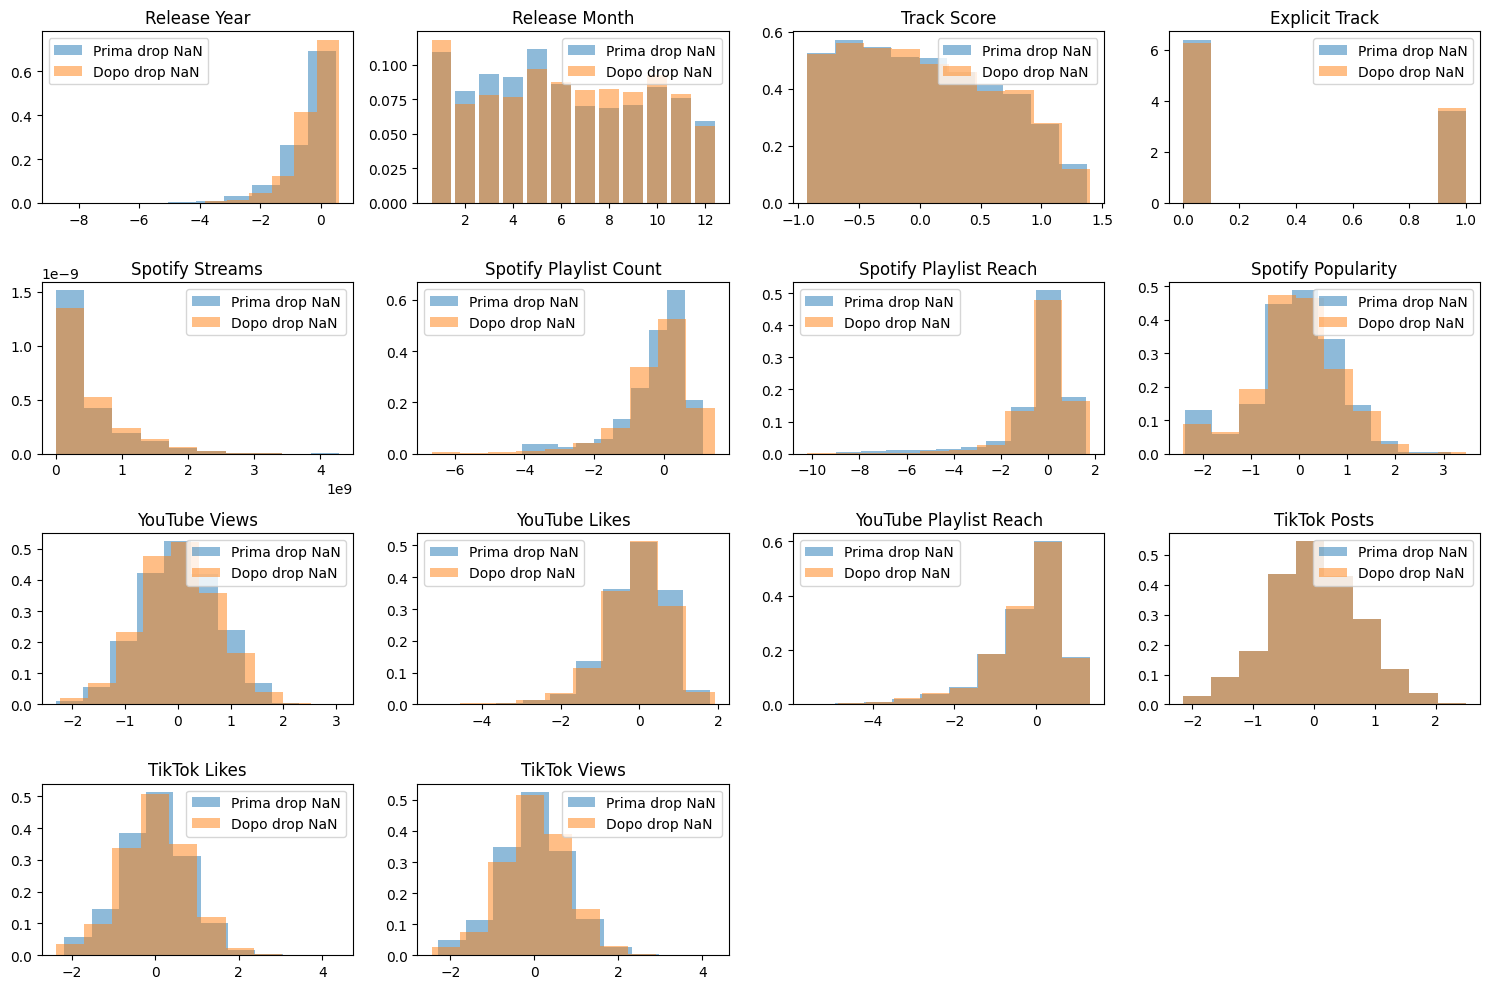

In [14]:
plt.figure(figsize=(15, 10))

i = 1
for col in columns:
  plt.subplot(4,4,int(i))
  if col == 'Release Month':
    conteggi = Counter(df['Release Month'])
    categorie = list(conteggi.keys())
    valori_conteggi = list(conteggi.values())
    frequenze_relative = np.array(valori_conteggi) / np.sum(valori_conteggi)
    plt.bar(categorie, frequenze_relative, alpha=0.5, label='Prima drop NaN')

    conteggi = Counter(df_drop['Release Month'])
    categorie = list(conteggi.keys())
    valori_conteggi = list(conteggi.values())
    frequenze_relative = np.array(valori_conteggi) / np.sum(valori_conteggi)
    plt.bar(categorie, frequenze_relative, alpha=0.5, label='Dopo drop NaN')
  else:
    plt.hist(df[col], alpha=0.5, label='Prima drop NaN', density=True)
    plt.hist(df_drop[col], alpha=0.5, label='Dopo drop NaN', density=True)
  plt.title(col)
  plt.legend()
  i=i+1

plt.tight_layout()
plt.show()

Le distribuzioni dei dati non subiscono cambiamenti troppo drastici prima e dopo il drop dei NaN, quindi ha senso proseguire con questa nuova versione del dataset.

Proseguo col rimuovere i restanti NaN tramite il metodo KNN Imputer.
Tuttavia, non ha senso andare a stimare i valori mancanti delle variabili indipendenti a partire dalla variabile target Spotify Streams e poi utilizzare i valori imputati per predire la variabile target stessa. Pertanto, sostituisco i 21 NaN presenti in Spotify Streams tramite tecniche di imputazione univariata, in particolare imputo con la mediana, ed escludo la colonna Spotify Streams dalla costruzione del modello di KNN Imputer.

In [15]:
median = df_drop['Spotify Streams'].median()
df_drop['Spotify Streams'] = df_drop['Spotify Streams'].fillna(median)

In [16]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
columns_knn_imputer = ['Release Year','Track Score','Explicit Track','Spotify Playlist Count',
                       'Spotify Playlist Reach','Spotify Popularity', 'YouTube Views','YouTube Likes',
                       'YouTube Playlist Reach','TikTok Posts','TikTok Likes','TikTok Views']

df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_drop[columns_knn_imputer]), columns=columns_knn_imputer)

Analogamente a quanto fatto prima, confronto la distribuzione di ogni variabile prima e dopo aver imputato i NaN.

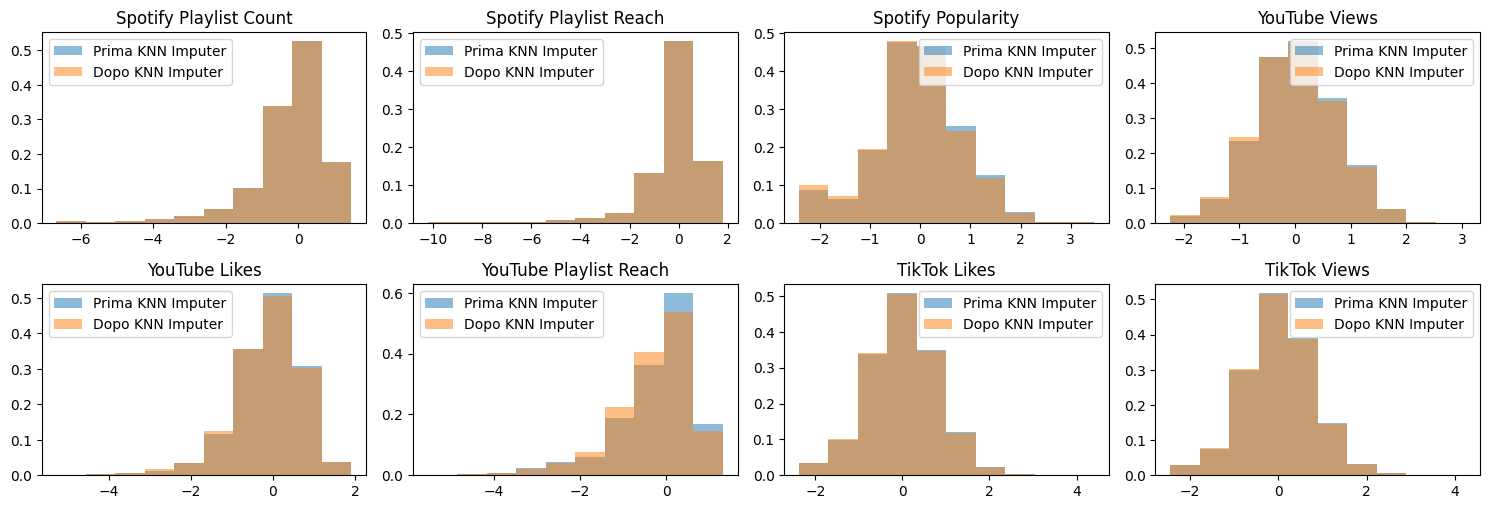

In [17]:
import matplotlib.pyplot as plt
columns_knn_imputed = ['Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity','YouTube Views',
                       'YouTube Likes','YouTube Playlist Reach','TikTok Likes','TikTok Views']

plt.figure(figsize=(15, 10))
i = 1
for col in columns_knn_imputed:
   plt.subplot(4,4,int(i))
   plt.hist(df_drop[col],alpha=0.5, label='Prima KNN Imputer', density=True)
   plt.hist(df_knn_imputed[col],alpha=0.5, label='Dopo KNN Imputer', density=True)
   plt.title(str(col))
   plt.legend()
   i=i+1

plt.tight_layout()
plt.show()

Dal momento che le distribuzioni prima e dopo l'imputazione sono molto simili, i risultati ottenuti possono essere considerati soddisfacenti e pertanto mantengo i valori appena imputati tramite KNN.

Inverto la normalizzazione tramite Robust Scaler e le trasformazioni logaritmo e Box-Cox per continuare a lavorare con i dati originali.

In [18]:
df_knn_imputed[columns_knn_imputer] = scaler_drop.inverse_transform(df_knn_imputed[columns_knn_imputer])

for var in to_log:
  df_knn_imputed.loc[:,var]=np.exp(df_knn_imputed[var])

from scipy.special import inv_boxcox
for var in to_box_cox:
  df_knn_imputed.loc[:,var]=inv_boxcox(df_knn_imputed[var], lambda_dict_drop[f'lambda_drop_{var}'])


Ricompongo il dataset inserendo le colonne numeriche appena imputate.

In [19]:
df = pd.concat([df_drop[['Track','Album Name','Artist']].reset_index(drop=True),df_knn_imputed['Release Year'],
                   df_drop['Release Month'].reset_index(drop=True), df_knn_imputed[['Track Score', 'Explicit Track']],
                   df_drop['Spotify Streams'].reset_index(drop=True),
                   df_knn_imputed[['Spotify Playlist Count', 'Spotify Playlist Reach','Spotify Popularity', 'YouTube Views','YouTube Likes',
                       'YouTube Playlist Reach','TikTok Posts','TikTok Likes','TikTok Views']]], axis=1)

Verifico che effettivamente non ci siano più NaN.

In [20]:
df.isna().sum()

,0
Track,0
Album Name,0
Artist,0
Release Year,0
Release Month,0
Track Score,0
Explicit Track,0
Spotify Streams,0
Spotify Playlist Count,0
Spotify Playlist Reach,0


A parte Track Score e Spotify Popularity, tutte le altre variabili numeriche dovrebbero contenere numeri interi positivi. In seguito alla trasformazione, normalizzazione e loro inversione, alcuni numeri hanno acquisito delle cifre decimali. Pertanto, approssimo ogni elemento di queste colonne all'intero più vicino trasformando le variabili di tipo float in tipo int.

In [21]:
columns_to_int = ['Release Year','Explicit Track','Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach','YouTube Views',
                   'YouTube Likes', 'YouTube Playlist Reach', 'TikTok Posts','TikTok Likes','TikTok Views']

for col in columns_to_int:
  df[col] = df[col].astype(int)

df.head()

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024,4,725.400001,0,390470936,30716,196631588,92.000001,84274754,1713126,150597040,5767700,651565900,5332281935
1,Not Like Us,Not Like Us,Kendrick Lamar,2024,5,545.900001,1,323703884,28113,174597137,92.000001,116347040,3486739,156380351,674700,35223547,208339025
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024,3,538.400001,0,601309283,54331,211607669,92.000001,122599116,2228730,373784955,3025400,275154237,3369120609
3,Flowers,Flowers - Single,Miley Cyrus,2023,1,444.900001,0,2031280633,269802,136569078,85.000001,1096100899,10629796,3351188581,7189811,1078757968,14603725993
4,Houdini,Houdini,Eminem,2024,5,423.300001,1,107034922,7223,151469874,88.000001,77373957,3670188,112763851,16400,33379235,199692611


# **Esplorazione del dataset**

*Misure di Centralità e Dispersione*


Inizio l'esplorazione del dataset, plottando la distribuzione di ogni variabile e calcolando le opportune misure di centralità e di dispersione.

Le colonne presenti nel dataset sono per la maggior parte di tipo numerico, in particolare la variabile Explicit Track è binaria.

La variabile Release Month la considero categorica in quanto assume valori da 1 a 12 (uno per ogni mese dell'anno).

La variabile Release Year, per quanto potrebbe essere ritenuta categorica, la considero come una semplice variabile numerica in quanto assume 37 valori diversi.

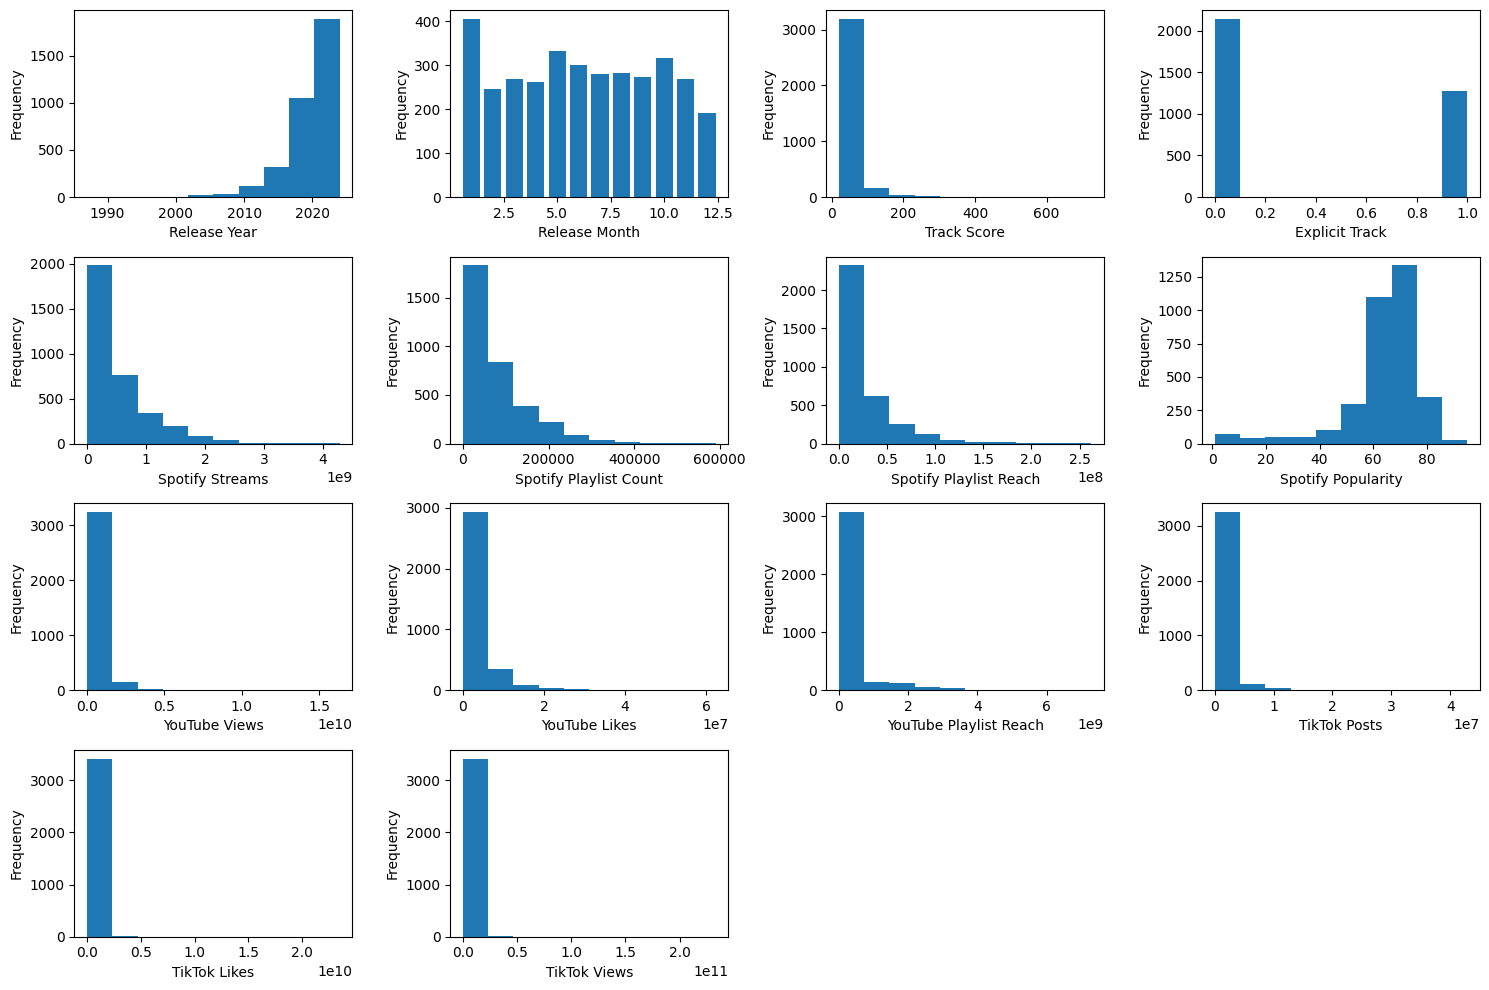

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))

i = 1
for col in df.columns[3:]:
  plt.subplot(4,4,int(i))
  if col == 'Release Month':
    counts = df['Release Month'].value_counts()
    plt.bar(counts.index, counts.values)
  else:
    plt.hist(df[col])
  plt.xlabel(col)
  plt.ylabel('Frequency')
  i=i+1

plt.tight_layout()
plt.show()

In base ai grafici appena plottati, le distribuzioni risultano essere asimmetriche. Pertanto, per le variabili numeriche come misura di centralità considero la mediana (per la variabile Release Year considero, per curiosità, anche la moda) e come misure di dispersione il Range, Q1, Q3 ed IQR.

Per le variabili categoriche (Explicit Track e Release Month) considero soltanto la moda.

In [23]:
for col in df.columns[3:]:
  print(col.upper())
  if col == 'Explicit Track' or col == 'Release Month':
    print('Moda:', df[col].mode()[0])
    print()
  else:
    if col == 'Release Year':
      print('Moda:', df[col].mode()[0])
    print('Mediana:', df[col].median())
    print()
    print('Range:', df[col].max()-df[col].min())
    print('Q1:', df[col].quantile(q=0.25))
    print('Q3:', df[col].quantile(q=0.75))
    print('IQR:', df[col].quantile(q=0.75)-df[col].quantile(q=0.25))
    print()
  print()


RELEASE YEAR
Moda: 2023
Mediana: 2021.0

Range: 37
Q1: 2018.0
Q3: 2023.0
IQR: 5.0


RELEASE MONTH
Moda: 1


TRACK SCORE
Mediana: 30.100000999999946

Range: 705.9999999999511
Q1: 23.50000100000004
Q3: 45.40000100000004
IQR: 21.9


EXPLICIT TRACK
Moda: 0


SPOTIFY STREAMS
Mediana: 344701547.0

Range: 4281467336
Q1: 133061000.0
Q3: 718634962.0
IQR: 585573962.0


SPOTIFY PLAYLIST COUNT
Mediana: 53828.0

Range: 590391
Q1: 20983.0
Q3: 107667.0
IQR: 86684.0


SPOTIFY PLAYLIST REACH
Mediana: 16024245.0

Range: 262343412
Q1: 6879843.0
Q3: 32621464.0
IQR: 25741621.0


SPOTIFY POPULARITY
Mediana: 67.00000099999997

Range: 94.00000000000043
Q1: 61.00000099999998
Q3: 72.00000100000003
IQR: 11.000000000000043


YOUTUBE VIEWS
Mediana: 179053648.0

Range: 16322745043
Q1: 57665106.0
Q3: 522422864.0
IQR: 464757758.0


YOUTUBE LIKES
Mediana: 1575190.0

Range: 62311108
Q1: 569439.0
Q3: 3950188.0
IQR: 3380749.0


YOUTUBE PLAYLIST REACH
Mediana: 54565314.0

Range: 7289707050
Q1: 7676873.0
Q3: 263463888.0
IQ

*Correlazione*

Per iniziare lo studio della correlazione tra le variabili del dataset, visualizzo la scatter matrix, dove sulla diagonale principale ci sono gli istogrammi di ciascuna variabile mentre nei restanti riquadri sono presenti gli scatter plot.

[]

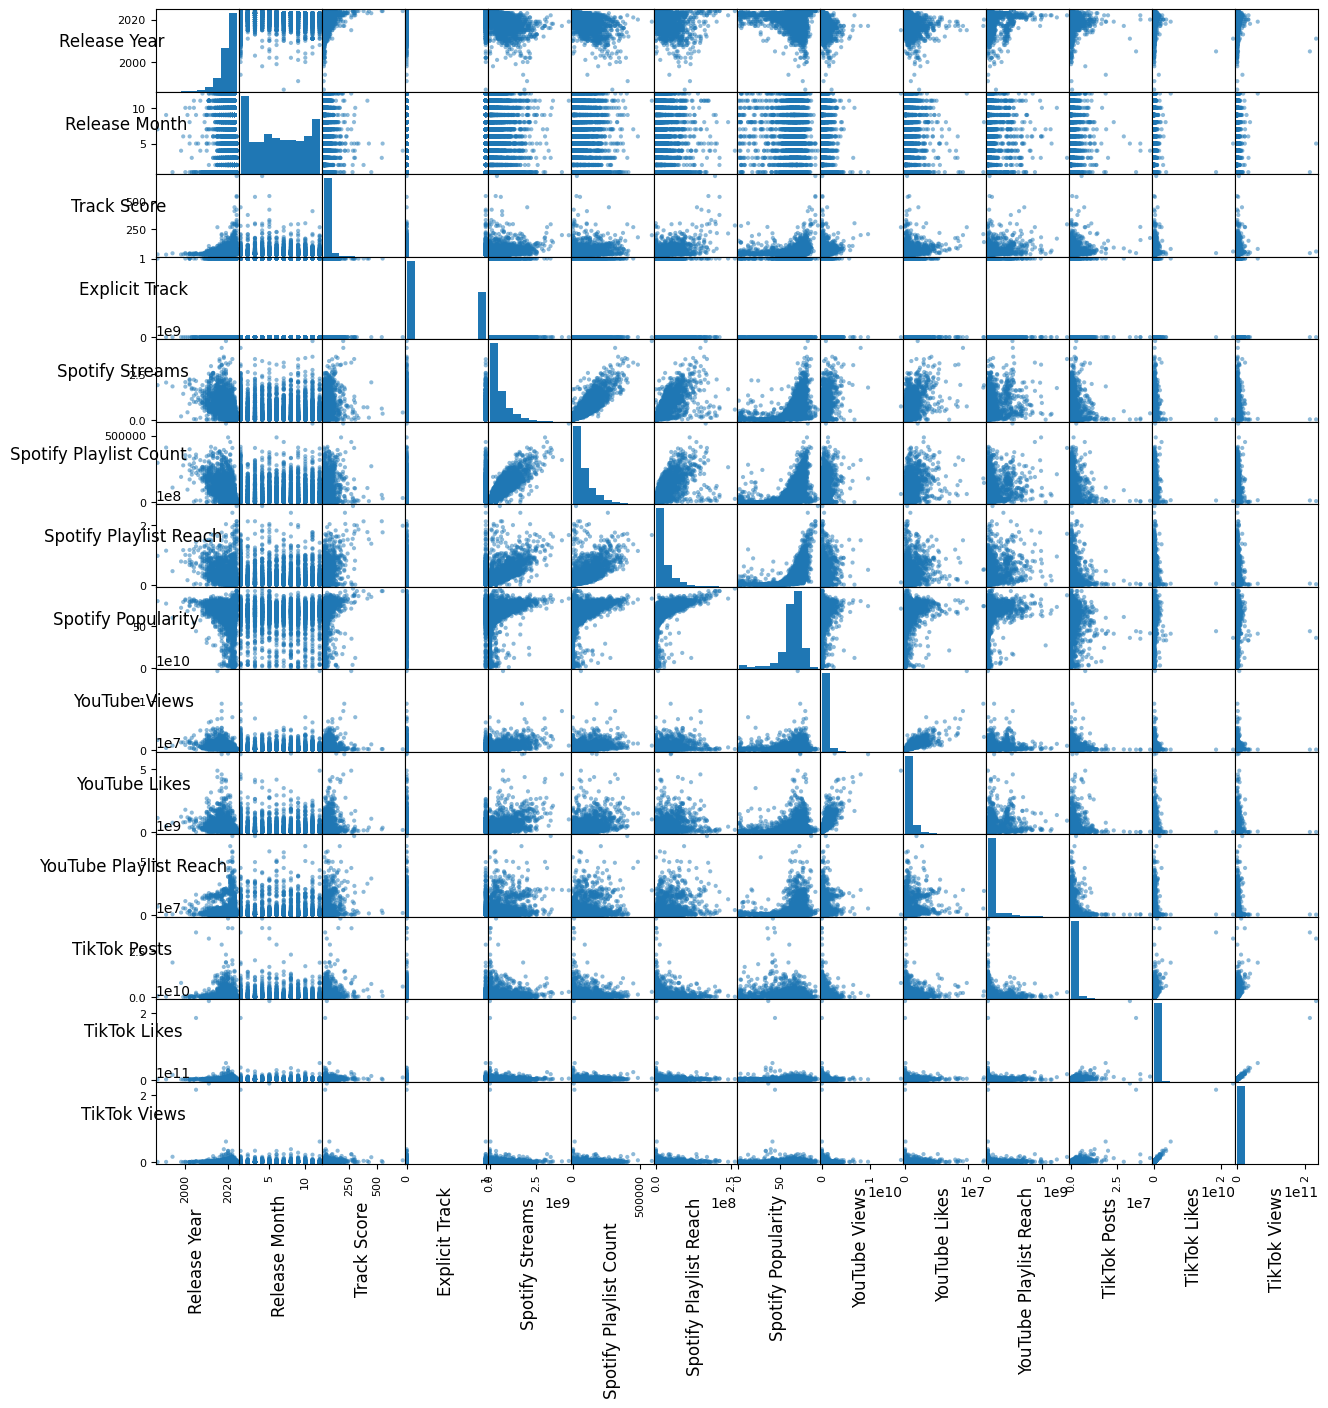

In [24]:
scatter_matrix = pd.plotting.scatter_matrix(df[['Release Year','Release Month','Track Score','Explicit Track',
                 'Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity',
                'YouTube Views','YouTube Likes','YouTube Playlist Reach', 'TikTok Posts','TikTok Likes','TikTok Views']],figsize=(15,15))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, rotation=90)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, rotation=0)

plt.plot()

Chiaramente i plot che si ottengono con le variabili categoriche (Release Month e Explicit Track) sono difficili da interpretare e non forniscono alcuna informazione rilevante.

Nello studio della correlazione tra le diverse variabili, per prima cosa mi concentro su quelle numeriche. Tra le misure di correlazione conosciute, in questo caso, ho deciso di utilizzare quella di Spearman.

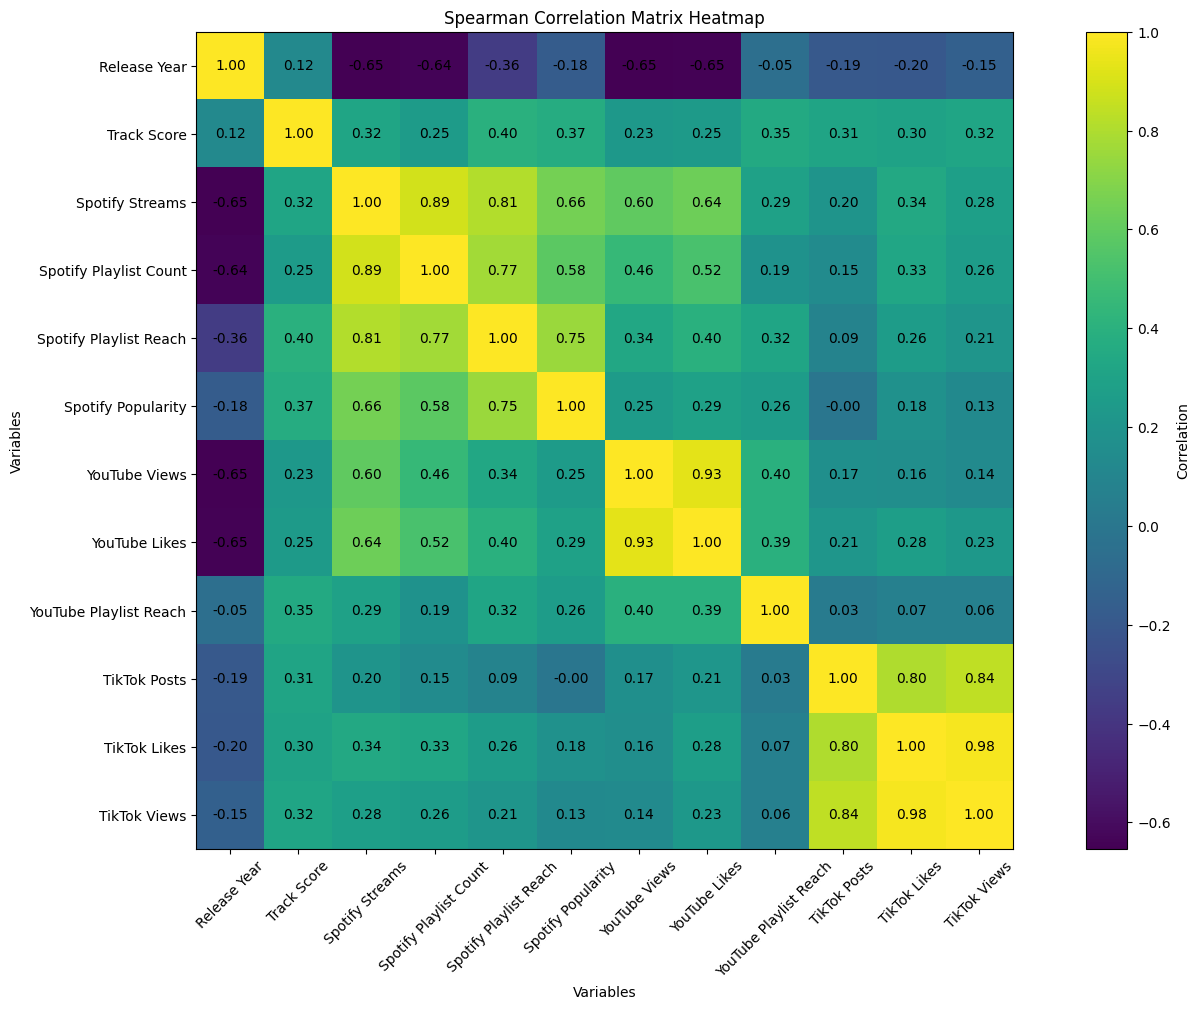

In [25]:
corr_spearman = df[['Release Year','Track Score','Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach',
                    'Spotify Popularity','YouTube Views','YouTube Likes','YouTube Playlist Reach','TikTok Posts',
                    'TikTok Likes','TikTok Views']].corr(method='spearman')

plt.figure(figsize=(15, 10))
plt.imshow(corr_spearman, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title('Spearman Correlation Matrix Heatmap')

for i in range(len(corr_spearman)):
    for j in range(len(corr_spearman)):
        plt.text(j, i, f"{corr_spearman.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.xticks(ticks=np.arange(len(corr_spearman.columns)), labels=corr_spearman.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_spearman.columns)), labels=corr_spearman.columns)
plt.tight_layout()
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

La matrice di correlazione, ottenuta tramite l'utilizzo del coefficiente di correlazione di Spearman, permette di identificare le relazioni lineari o monotone tra le variabili numeriche. I valori sono compresi tra -1 e 1:
* valori vicini a 1 indicano una forte correlazione positiva
* valori vicini a -1 indicano una forte correlazione negativa
* valori vicini a 0 indicano che non c'è correlazione

Ora uso il test del χ² per calcolare la correlazione tra la variabile binaria (Explicit Track) e la variabile categorica (Release Month).

Il test del χ² è un test statistico utilizzato per determinare se esiste una relazione significativa tra due variabili categoriche.

In [26]:
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df['Release Month'], df['Explicit Track'])
chi2, p, dof, expected = chi2_contingency (cross_tab)
print ("Test del chi-quadrato tra 'Release Month' e 'Explicit Track':")
print ("Valore di chi-quadrato:", chi2)
print ("P-value:", p)
print('Gradi di libertà:', dof)

Test del chi-quadrato tra 'Release Month' e 'Explicit Track':
Valore di chi-quadrato: 31.364902416424968
P-value: 0.0009637071216215673
Gradi di libertà: 11


Per poter dire se queste due variabili sono correlate o meno, bisogna guardare la tavola dei valori critici del χ² .
Il valore all'incrocio tra il grado di libertà e il livello di significatività è 31.264 < 31.365. Alla luce di ciò si ottiene che le due variabili sono correlate.

Infine, per confrontare la variabile 'Explicit Track' (binaria) con le colonne numeriche utilizzo il metodo Point-Biserial.

Esso restituisce un valore compreso tra -1 e 1:

* valori vicini a 1 indicano che c'è una forte associazione tra la presenza della variabile binaria e valori più alti della variabile numerica;

* valori vicini a -1 indicano una forte associazione tra la presenza della variabile binaria e valori più bassi della variabile numerica;

* valori vicini a 0 indicano che non c'è una forte associazione tra la variabile binaria e la variabile numerica.



In [27]:
from scipy.stats import chi2_contingency, pointbiserialr
for col in ['Track Score','Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity',
            'YouTube Views','YouTube Likes','YouTube Playlist Reach','TikTok Posts','TikTok Likes','TikTok Views']:
    statistic, p_value = pointbiserialr(df[col], df['Explicit Track'])
    if p_value < 0.05:
        print(f'Il risultato del test è significativo. La correlazione tra Explicit Track e {col}: {statistic}')
    else:
        print(f'Non si può dire nulla sulla correlazione tra Explicit Track e {col}')

Il risultato del test è significativo. La correlazione tra Explicit Track e Track Score: 0.03709300274163853
Non si può dire nulla sulla correlazione tra Explicit Track e Spotify Streams
Il risultato del test è significativo. La correlazione tra Explicit Track e Spotify Playlist Count: 0.12108683069551734
Non si può dire nulla sulla correlazione tra Explicit Track e Spotify Playlist Reach
Non si può dire nulla sulla correlazione tra Explicit Track e Spotify Popularity
Il risultato del test è significativo. La correlazione tra Explicit Track e YouTube Views: -0.14364474275209085
Il risultato del test è significativo. La correlazione tra Explicit Track e YouTube Likes: -0.10974806196991235
Il risultato del test è significativo. La correlazione tra Explicit Track e YouTube Playlist Reach: -0.06966020713078724
Il risultato del test è significativo. La correlazione tra Explicit Track e TikTok Posts: -0.053229370568940136
Non si può dire nulla sulla correlazione tra Explicit Track e TikTok L

Nel caso di test significativo, dal momento che i coefficienti di Point Biserial sono tutti vicini allo 0, le due variabili considerate non sono correlate.

# **Outlier Detection**

Procedo col determinare se ci sono o meno outlier.
Mi concentro su tutte le variabili numeriche, escludendo la variabile categorica Release Month.

In [28]:
columns_outlier = ['Release Year', 'Explicit Track','Track Score','Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity',
                  'YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach', 'TikTok Posts', 'TikTok Likes', 'TikTok Views']

df_outliers = df[columns_outlier]
df_outliers.head()

,Release Year,Explicit Track,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,2024,0,725.400001,390470936,30716,196631588,92.000001,84274754,1713126,150597040,5767700,651565900,5332281935
1,2024,1,545.900001,323703884,28113,174597137,92.000001,116347040,3486739,156380351,674700,35223547,208339025
2,2024,0,538.400001,601309283,54331,211607669,92.000001,122599116,2228730,373784955,3025400,275154237,3369120609
3,2023,0,444.900001,2031280633,269802,136569078,85.000001,1096100899,10629796,3351188581,7189811,1078757968,14603725993
4,2024,1,423.300001,107034922,7223,151469874,88.000001,77373957,3670188,112763851,16400,33379235,199692611


Innanzitutto, determino gli outlier globali tramite il metodo DBSCAN. Tale metodo è un algoritmo di clustering che va a creare attorno a ogni punto un'ipersfera avente un determinato raggio. Individuando tutte quelle ipersfere che non hanno punti al loro interno, è in grado di determinare gli outlier che si trovano in regioni poco dense dello spazio.

Dato che in DBSCAN viene utilizzato KNN, è utile trasformare opportunamente e normalizzare le variabili (come già fatto in precedenza).

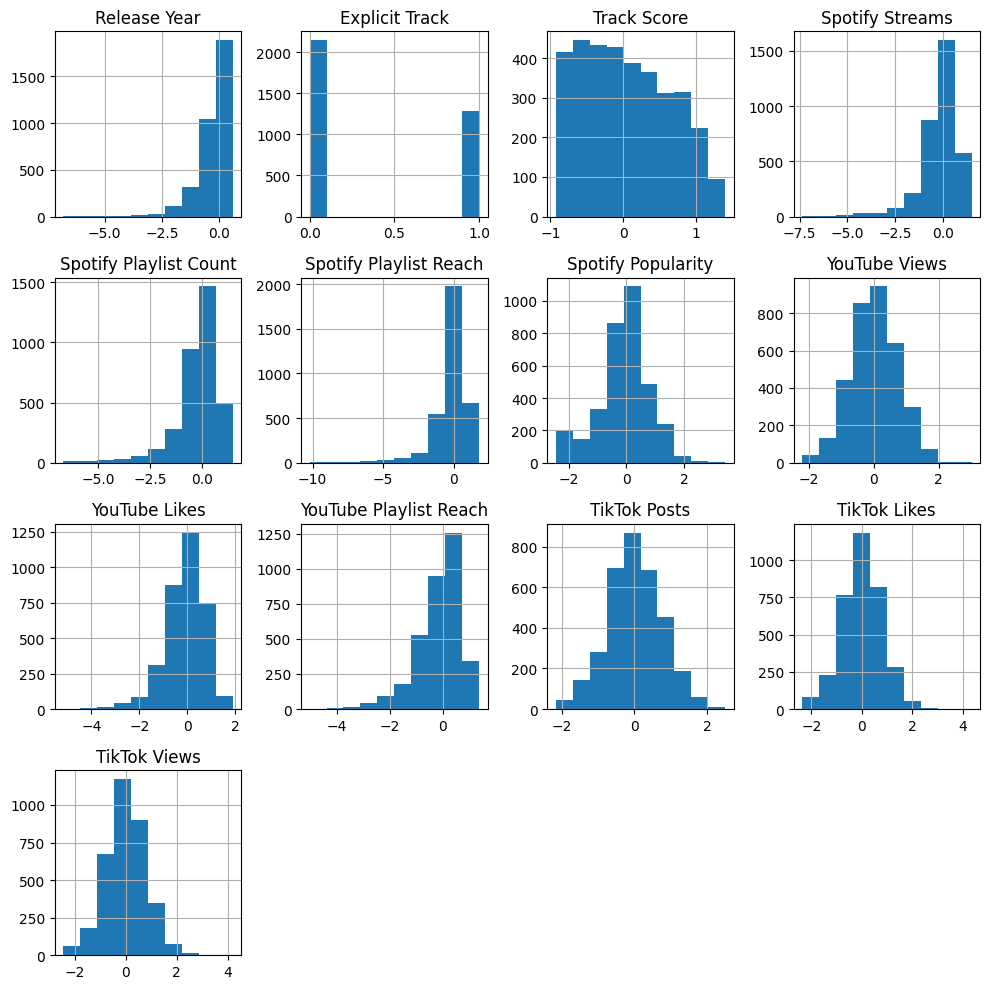

In [29]:
no_transf = ['Release Year', 'Explicit Track']
to_log = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Likes', 'YouTube Playlist Reach']
to_box_cox = ['Track Score', 'Spotify Popularity', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'TikTok Views']

df_transformed = df_outliers.copy()

for var in to_log:
  df_transformed[var]=np.log(df_outliers[var]+ 1e-6)

for var in to_box_cox:
  df_transformed[var],lambda0 = boxcox(df_outliers[var] + 1e-6)

scaler=RobustScaler()
columns_to_scale = ['Release Year', 'Explicit Track', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
                    'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach', 'TikTok Posts', 'TikTok Likes', 'TikTok Views']
df_transformed_scaled = pd.DataFrame(scaler.fit_transform(df_transformed), columns=columns_to_scale)

df_transformed_scaled.hist(figsize=[10,10])
plt.tight_layout()
plt.show()

Applico DBSCAN scegliendo:
* `epsilon = 2` in corrispondenza della massima curvatura del grafico della distanza dei KNN
* `min_samples = 18` più grande del numero di colonne + 1 (quindi deve essere almeno 15)

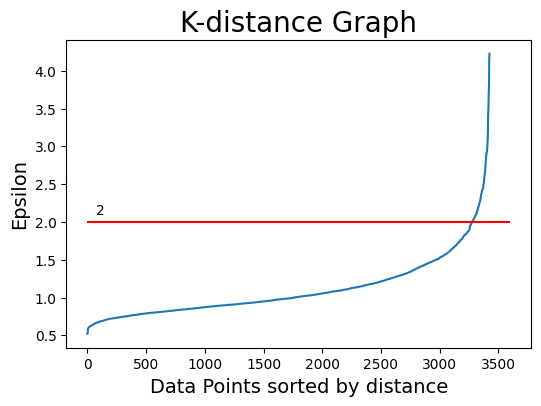

Value Counts:
-1: 143
0: 3282


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df_transformed_scaled)
distances, indices = nbrs.kneighbors(df_transformed_scaled)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,-1]
plt.figure(figsize=(6,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14,color='k')
plt.hlines(2, 3600, 0, colors='red')
plt.text(70, 2.15, '2', ha ='left', va ='center')
plt.show()


model = DBSCAN(eps = 2, min_samples = 18).fit(df_transformed_scaled)
labels_dbscan = model.labels_
outliers_DBSCAN=(labels_dbscan==-1).astype(int)


# Get unique values and their counts
unique_values, counts = np.unique(labels_dbscan, return_counts=True)

# Create a dictionary to store the counts of each value
value_counts = dict(zip(unique_values, counts))

# Print the value counts
print("Value Counts:")
for value, count in value_counts.items():
    print(f"{value}: {count}")

Sono stati individuati in tutto 143 outlier globali.

Considero lo scatter plot tra la variabile Spotify Streams e alcune altre variabili prese in esame.

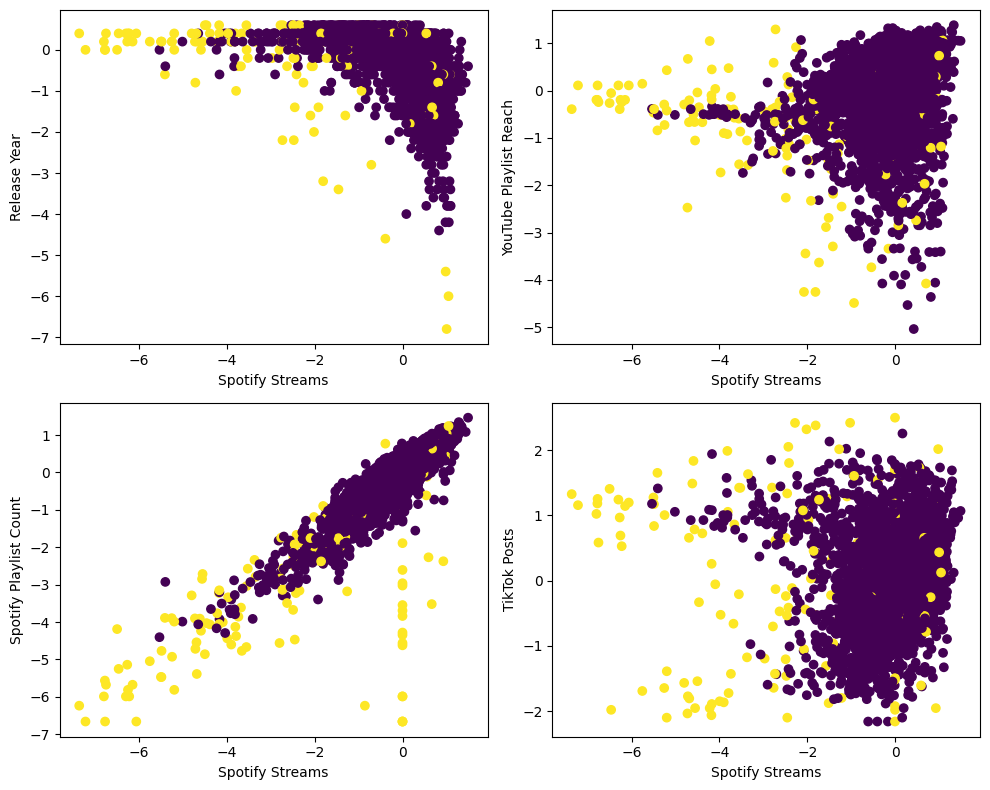

In [31]:
plt.figure(figsize=(10,8))
i = 1
for var in ['Release Year', 'YouTube Playlist Reach', 'Spotify Playlist Count', 'TikTok Posts']:
  plt.subplot(2,2,int(i))
  plt.scatter(df_transformed_scaled['Spotify Streams'],df_transformed_scaled[var],c=outliers_DBSCAN)
  plt.xlabel('Spotify Streams')
  plt.ylabel(var)
  i=i+1
plt.tight_layout()
plt.show()

Per avere una visione più ampia della distribuzione dei punti e della disposzione degli outlier nello spazio, riduco la dimensionalità del dataset a 3 variabili tramite PCA e considero un 3D scatter plot delle componenti principali individuate.

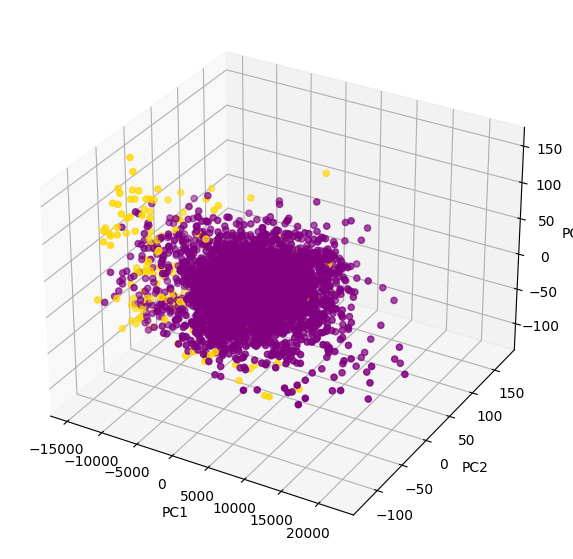

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_transformed)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
color_map = {0: 'purple', 1: 'gold'}
colors = [color_map[val] for val in outliers_DBSCAN]

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colors, marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

Verifico anche se ci siano degli outlier locali tramite il metodo LOF. Tale metodo confronta la densità di ciascun punto con quella dei suoi vicini: se un punto ha una densità molto più piccola rispetto a quella dei suoi vicini (e quindi è un punto isolato localmente), viene considerato un outlier.

Anche questo metodo utilizza KNN, quindi ha senso proseguire con i dati trasformati e normalizzati.

Scelgo un fattore di contaminazione dello 0.85%.

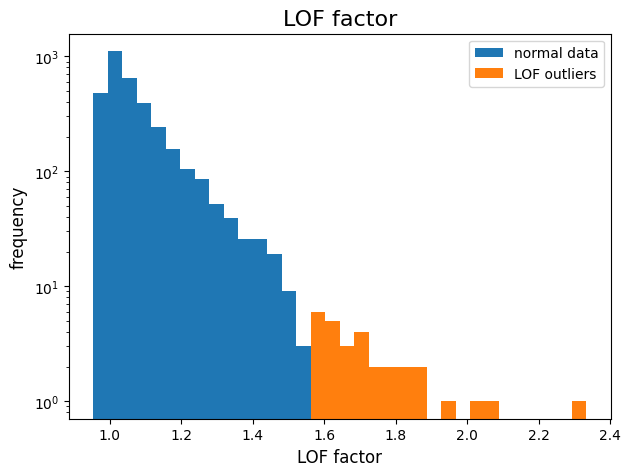

Numero di outlier locali: 30


In [33]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(novelty=False,contamination=0.0085)
labels_lof = lof.fit_predict(df_transformed_scaled)


lof_scores=-lof.negative_outlier_factor_
plt.figure(figsize=(7,5))
plt.hist(lof_scores[labels_lof>-1],bins=np.linspace(min(lof_scores), max(lof_scores), 35),label='normal data')
plt.hist(lof_scores[labels_lof==-1],bins=np.linspace(min(lof_scores), max(lof_scores), 35),label='LOF outliers')
plt.xlabel('LOF factor',fontsize=12)
plt.ylabel('frequency',fontsize=12)
plt.title('LOF factor',fontsize=16)
plt.legend()
plt.yscale('log')
plt.show()
print('Numero di outlier locali:', (labels_lof==-1).sum())

Allo stesso modo, considero gli scatter plot tra la variabile Spotify Streams e le variabili considerate precedentemente e il 3D scatter plot delle tre componenti principali.

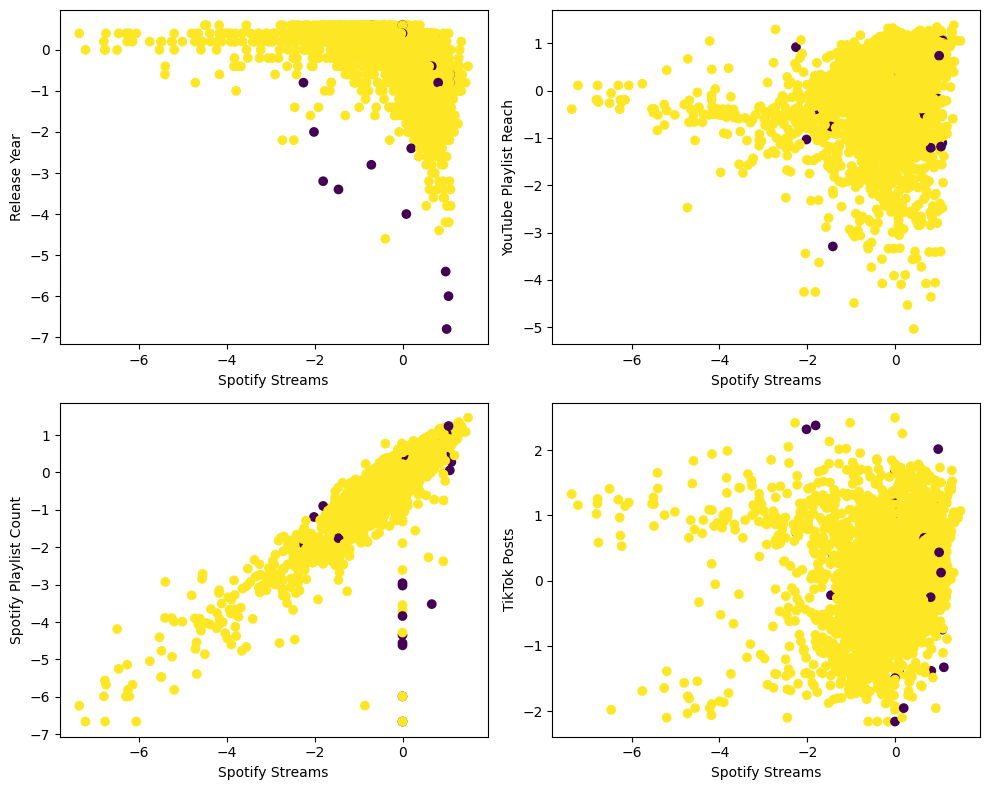

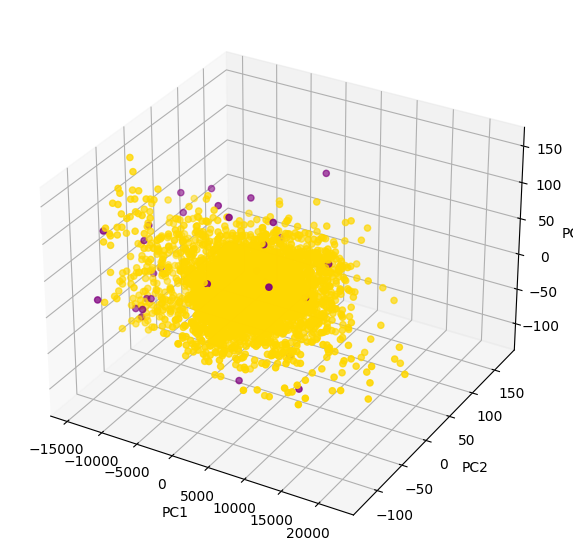

In [34]:
plt.figure(figsize=(10,8))
i = 1
for var in ['Release Year', 'YouTube Playlist Reach', 'Spotify Playlist Count', 'TikTok Posts']:
  plt.subplot(2,2,int(i))
  plt.scatter(df_transformed_scaled['Spotify Streams'],df_transformed_scaled[var],c=labels_lof)
  plt.xlabel('Spotify Streams')
  plt.ylabel(var)
  i=i+1
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
color_map = {-1: 'purple', 1: 'gold'}
colors = [color_map[val] for val in labels_lof]

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=colors, marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

In tutto ci sono 143 oulier globali e 30 outlier locali.
Verifico quanti di questi coincidono.

In [35]:
print("Numero di outliers coincidenti:", np.sum(labels_lof == labels_dbscan))

Numero di outliers coincidenti: 23


In definitiva sono stati individuati 150 outlier.

Poiché dagli scatter plot è possibile individuare cluster di outlier che si discostano maggiormente dalla distribuzione degli altri punti. rimuovo tutti gli outlier individuati da DBSAN e LOF.

In [36]:
df_no_outlier = df.copy()
df_no_outlier = df_no_outlier[(labels_dbscan!=-1)&(labels_lof!=-1)]
df_no_outlier

,Track,Album Name,Artist,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024,4,725.400001,0,390470936,30716,196631588,92.000001,84274754,1713126,150597040,5767700,651565900,5332281935
1,Not Like Us,Not Like Us,Kendrick Lamar,2024,5,545.900001,1,323703884,28113,174597137,92.000001,116347040,3486739,156380351,674700,35223547,208339025
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024,3,538.400001,0,601309283,54331,211607669,92.000001,122599116,2228730,373784955,3025400,275154237,3369120609
3,Flowers,Flowers - Single,Miley Cyrus,2023,1,444.900001,0,2031280633,269802,136569078,85.000001,1096100899,10629796,3351188581,7189811,1078757968,14603725993
4,Houdini,Houdini,Eminem,2024,5,423.300001,1,107034922,7223,151469874,88.000001,77373957,3670188,112763851,16400,33379235,199692611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3420,3 Haselnï¿½ï¿,3 Haselnï¿½ï¿½sse - Si,Jaques Raupï¿,2023,12,19.400001,0,25822176,15387,2650670,58.913177,7041124,127998,48311550,4034,1858466,31061916
3421,For the Last Time,For the Last Time,$uicideboy$,2017,9,19.400001,1,305049963,65770,5103054,71.000001,149247747,1397590,53016,48370,20202000,143934379
3422,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020,2,19.400001,1,189972685,72066,6704802,65.000001,201027333,1081402,29253152,7596,5288677,36849005
3423,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016,11,19.400001,0,145467020,14037,7387064,66.000001,1118595159,3868828,25150516,11433,2534831,37757301


# **Predizione**

L'obiettivo, adesso, è quello di predire il numero di streams su Spotify a partire dalle altre informazioni di ciascuna canzone, utilizzando un modello di regressione lineare.

In [37]:
df_pred = df_no_outlier.copy()
df_pred.drop(['Track', 'Album Name', 'Artist'], axis=1, inplace=True)
df_pred.head()

,Release Year,Release Month,Track Score,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,YouTube Playlist Reach,TikTok Posts,TikTok Likes,TikTok Views
0,2024,4,725.400001,0,390470936,30716,196631588,92.000001,84274754,1713126,150597040,5767700,651565900,5332281935
1,2024,5,545.900001,1,323703884,28113,174597137,92.000001,116347040,3486739,156380351,674700,35223547,208339025
2,2024,3,538.400001,0,601309283,54331,211607669,92.000001,122599116,2228730,373784955,3025400,275154237,3369120609
3,2023,1,444.900001,0,2031280633,269802,136569078,85.000001,1096100899,10629796,3351188581,7189811,1078757968,14603725993
4,2024,5,423.300001,1,107034922,7223,151469874,88.000001,77373957,3670188,112763851,16400,33379235,199692611


Innanzitutto, mi concentro sulle variabili numeriche che hanno una correlazione moderata (con modulo > 0.35). Dunque, escludo le variabili: Track Score, YouTube Playlist Reach, TikTok Posts, TikTok Likes e TikTok Views. Per evitare collinearità (variabili indipendenti fortemente correlate), scarto anche YouTube Views.

Verifico che le variabili scelte siano adatte allo scopo plottando gli scatter plot tra Spotify Streams e le altre variabili, dopo averle opportunamente trasformate.

In [38]:
df_pred.drop(['Track Score','YouTube Playlist Reach','YouTube Views', 'TikTok Posts', 'TikTok Views','TikTok Likes'], axis=1, inplace=True)
df_pred.head()

,Release Year,Release Month,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Likes
0,2024,4,0,390470936,30716,196631588,92.000001,1713126
1,2024,5,1,323703884,28113,174597137,92.000001,3486739
2,2024,3,0,601309283,54331,211607669,92.000001,2228730
3,2023,1,0,2031280633,269802,136569078,85.000001,10629796
4,2024,5,1,107034922,7223,151469874,88.000001,3670188


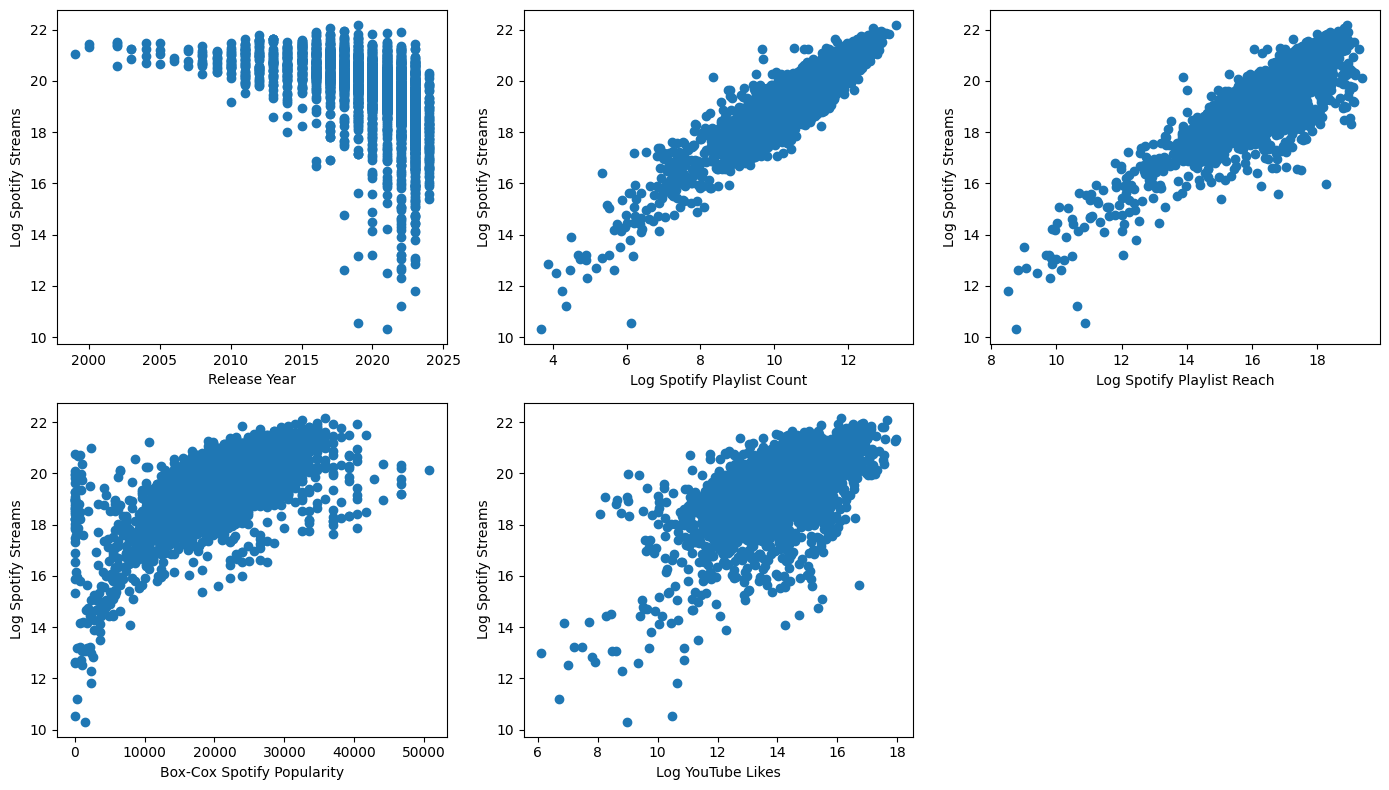

In [39]:
plt.figure(figsize=(14,8))
i = 1
for var in ['Release Year','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity','YouTube Likes']:
  plt.subplot(2,3,int(i))
  if var == 'Spotify Popularity':
    df_pred['Box-Cox Spotify Popularity'], lambda_value = boxcox(df_pred['Spotify Popularity'] + 1e-6)
    plt.scatter(df_pred['Box-Cox Spotify Popularity'], np.log(df_pred['Spotify Streams']))
    plt.xlabel('Box-Cox Spotify Popularity')
    plt.ylabel('Log Spotify Streams')
    df_pred.drop('Box-Cox Spotify Popularity', axis=1, inplace=True)
  else:
    if var == 'Release Year':
      plt.scatter(df_pred[var], np.log(df_pred['Spotify Streams']))
      plt.xlabel(var)
      plt.ylabel('Log Spotify Streams')
    else:
      plt.scatter(np.log(df_pred[var]), np.log(df_pred['Spotify Streams']))
      plt.xlabel(f'Log {var}')
      plt.ylabel('Log Spotify Streams')

  i=i+1
plt.tight_layout()
plt.show()




Questi scatter plot confermano che è possibile continuare con il modello di regressione lineare.

Considero ora la correlazione tra le variabili categoriche (Explicit Track e Release Month) con la variabile target (Spotify Streams).


Per gestire opportunamente la variabile categorica Release Month faccio dummyfication. Per ogni valore che può assumere la variabile categorica creo una nuova colonna che valga 1 se l'osservazione appartiene a quella categoria, 0 altrimenti. In particolare, escludo la prima colonna per evitare collinearità.

In [40]:
df_pred_dummy = pd.get_dummies(df_pred, columns=['Release Month'], drop_first=True, dtype=int)
df_pred_dummy.head()

,Release Year,Explicit Track,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Likes,Release Month_2,Release Month_3,Release Month_4,Release Month_5,Release Month_6,Release Month_7,Release Month_8,Release Month_9,Release Month_10,Release Month_11,Release Month_12
0,2024,0,390470936,30716,196631588,92.000001,1713126,0,0,1,0,0,0,0,0,0,0,0
1,2024,1,323703884,28113,174597137,92.000001,3486739,0,0,0,1,0,0,0,0,0,0,0
2,2024,0,601309283,54331,211607669,92.000001,2228730,0,1,0,0,0,0,0,0,0,0,0
3,2023,0,2031280633,269802,136569078,85.000001,10629796,0,0,0,0,0,0,0,0,0,0,0
4,2024,1,107034922,7223,151469874,88.000001,3670188,0,0,0,1,0,0,0,0,0,0,0


Ora è possibile analizzare la correlazione (usando Point Biserial) tra le variabili binarie (Explicit Track e quelle appena trasformate attraverso dummyfication) e la variabile numerica (Spotify Streams).

In [41]:
binary_vars = ['Explicit Track', 'Release Month_2', 'Release Month_3', 'Release Month_4', 'Release Month_5', 'Release Month_6',
             'Release Month_7', 'Release Month_8', 'Release Month_9', 'Release Month_10', 'Release Month_11', 'Release Month_12']

from scipy.stats import pointbiserialr
binary_for_regressions=[]

for attribute in binary_vars:
  r,p_value = pointbiserialr(df_pred_dummy['Spotify Streams'], df_pred_dummy[attribute])
  if p_value < 0.05:
    print(f'Il risultato del test è significativo. La correlazione tra Spotify Streams e {attribute}: {r}')
    if np.abs(r) > 0.35:
      binary_for_regressions.append(attribute)
  else:
    print(f'Non si può dire nulla sulla correlazione tra Spotify Streams e {attribute}')

Il risultato del test è significativo. La correlazione tra Spotify Streams e Explicit Track: -0.03440410338237408
Non si può dire nulla sulla correlazione tra Spotify Streams e Release Month_2
Non si può dire nulla sulla correlazione tra Spotify Streams e Release Month_3
Il risultato del test è significativo. La correlazione tra Spotify Streams e Release Month_4: -0.034485738095991876
Non si può dire nulla sulla correlazione tra Spotify Streams e Release Month_5
Il risultato del test è significativo. La correlazione tra Spotify Streams e Release Month_6: -0.053586970170252726
Non si può dire nulla sulla correlazione tra Spotify Streams e Release Month_7
Il risultato del test è significativo. La correlazione tra Spotify Streams e Release Month_8: -0.03519715744374118
Il risultato del test è significativo. La correlazione tra Spotify Streams e Release Month_9: -0.0410721161391993
Non si può dire nulla sulla correlazione tra Spotify Streams e Release Month_10
Non si può dire nulla sulla c

Dal momento che molti test non risultano essere significativi o comunque la correlazione ottenuta risulta essere molto bassa, non tengo alcuna variabile binaria.

In [42]:
binary_for_regressions

[]

Definisco ora le variabili features (variabili indipendenti) e target (variabile dipendente) e divido il dataset in training set e test set. Una volta definite le variabili, le trasformo opportunamente e le normalizzo attraverso Robust Scaler.

Siccome Box-Cox dipende dal parametro lambda, la trasformazione deve essere calcolata solo sul training set e il lambda ottimale ottenuto deve essere utilizzato per effettuare sul test set la stessa trasformazione fittata sul training set. La stessa cosa vale per il Robust Scaler.

In [43]:
from sklearn.model_selection import train_test_split

no_transf = ['Release Year']
to_log = ['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach', 'YouTube Likes']
to_box_cox = ['Spotify Popularity']

data_for_reg = df_pred[['Release Year','Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','Spotify Popularity','YouTube Likes']]

data_train, data_test = train_test_split(data_for_reg, test_size=0.3, random_state=0)

for var in to_log:
  data_train[var] = np.log(data_train[var])
  data_train = data_train.rename(columns={var: f'Log {var}'})
  data_test[var] = np.log(data_test[var])
  data_test = data_train.rename(columns={var: f'Log {var}'})

for var in to_box_cox:
  data_train[var], lambda_value = boxcox(data_train[var] + 1e-6)
  data_train = data_train.rename(columns={var: f'Box-Cox {var}'})
  data_test[var] = boxcox(data_test[var] + 1e-6, lmbda=lambda_value)
  data_test = data_test.rename(columns={var: f'Box-Cox {var}'})


to_rescale = ['Release Year','Log Spotify Streams', 'Log Spotify Playlist Count', 'Log Spotify Playlist Reach', 'Box-Cox Spotify Popularity', 'Log YouTube Likes']
target = ['Log Spotify Streams']
features = ['Release Year', 'Log Spotify Playlist Count', 'Log Spotify Playlist Reach', 'Box-Cox Spotify Popularity', 'Log YouTube Likes']

scaler = RobustScaler()

transformed_data_train = data_train.copy()
transformed_data_train[to_rescale] = scaler.fit_transform(data_train[to_rescale])

transformed_data_test = data_test.copy()
transformed_data_test[to_rescale] = scaler.transform(data_test[to_rescale])

X_train = transformed_data_train[features]
y_train = transformed_data_train[target]

X_test = transformed_data_test[features]
y_test = transformed_data_test[target]

Infine, predico il logartimo degli Streams su Spotify usando il modello di regressione lineare.

In [44]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
print(f"L'errore assoluto medio (MAE) della regressione è {MAE:.2f}.")
print(f'Il coefficiente R² della regressione è {r2_score(y_test,y_pred):.2f}.')

L'errore assoluto medio (MAE) della regressione è 0.18.
Il coefficiente R² della regressione è 0.92.


Ciò che è stato predetto è il logaritmo degli Spotify Streams. Per vedere come si comporta il modello sui dati originali senza trasformazione è necessario invertire il logaritmo applicando l'esponenziale e invertire la normalizzazione Robust Scaler.

In [45]:
predicted_df = transformed_data_test[to_rescale].copy()
predicted_df['Log Spotify Streams'] = y_pred
predicted_df[to_rescale] = scaler.inverse_transform(predicted_df[to_rescale])
predicted_df['Spotify Streams'] = np.exp(predicted_df['Log Spotify Streams'])
relative_MAE = mean_absolute_error(predicted_df['Spotify Streams'], np.exp(data_test['Log Spotify Streams']))/np.mean(np.exp(data_test['Log Spotify Streams']))

print(f"L'errore assoluto medio relativo della regressione è: {round(relative_MAE*100,2)}%")

L'errore assoluto medio relativo della regressione è: 23.79%


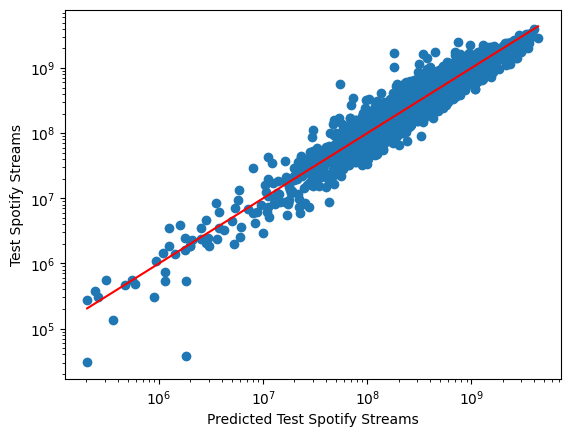

In [46]:
plt.scatter(predicted_df['Spotify Streams'],np.exp(data_test['Log Spotify Streams']))
plt.xlabel('Predicted Test Spotify Streams')
plt.ylabel('Test Spotify Streams')
plt.xscale('log')
plt.yscale('log')
x = predicted_df['Spotify Streams']
plt.plot(np.linspace(min(x), max(x), 30), np.linspace(min(x), max(x), 30), color='red')
plt.show()

# **Conclusione**

L'obiettivo di questo progetto era quello di predire gli stream di una canzone sulla piattaforma digitale Spotify a partire da altre informazioni relative alla stessa canzone contenute nel dataset.

Ho innanzitutto pulito il dataset eliminando i duplicati e gestendo i NaN. Sono state rimosse tutte quelle righe aventi dati mancanti in corrispondenza della colonna TikTok Posts, invece gli altri NaN sono stati imputati tramite KNN.

Ho ottenuto, così, un dataset adatto a proseguire nell'analisi. Innanzitutto, ho effettuato un'analisi esplorativa dei dati calcolando le varie misure di centralità e di dispersione e misurando la correlazione tra le diverse variabili del dataset.

Successivamente, ho individuato tutti quei punti anomali (outlier) che si discostassero significativamente dagli altri, al fine di togliere dati rumorosi dal dataset per cercare di costruire un modello predittivo affidabile.

Infine, ho costruito un modello di regressione lineare, trasformando opportunamente le variabili, per predire il logaritmo degli Spotify Streams. In particolare, ho ottenuto un coefficiente R² di 0.92 e un MAE di 0.18. Tuttavia, invertendo il logaritmo, il modello costruito perde un po' in capacità predittiva in quanto si ottiene un MAE relativo del 23.79%.